In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re

In [7]:
dt = pd.read_csv("C:/Users/DELL/Desktop/PES/DA Project/matches.csv")

In [8]:
dt.head(10)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [9]:
#data cleaning, error detection in dataset

error=0
for i in range(len(dt['win_by_runs'])):
    if dt['win_by_runs'][i]> 0 and dt['win_by_wickets'][i]>0:
        error+=1
    else:
        pass

if error>0:
    print('Error')
else:
    print('No Error')

No Error


In [10]:
#cleaning the dataset
df=dt.drop(["id","venue","umpire1","umpire2","umpire3"],axis=1)

In [11]:
df.isnull()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,False,False,False,False,False,False,False,False,False,False,False,False,False
752,False,False,False,False,False,False,False,False,False,False,False,False,False
753,False,False,False,False,False,False,False,False,False,False,False,False,False
754,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#Win percentage if team elects to bat after winning toss

bat_and_match_win=0
for i in range(len(df['toss_winner'])):
    if (df['toss_decision'][i] == 'bat' and df['toss_winner'][i]==df['winner'][i]):
        bat_and_match_win +=1

toss_and_match_win_percent=(bat_and_match_win/756)*100
print("First bat and match win percent is",toss_and_match_win_percent)

The toss and match win percent is 17.724867724867725


In [15]:
#Win percentage if team elects to field after winning toss

field_and_match_win=0
for i in range(len(df['toss_winner'])):
    if (df['toss_decision'][i] == 'field' and df['toss_winner'][i]==df['winner'][i]):
        field_and_match_win +=1

toss_and_match_win_percent=(field_and_match_win/756)*100
print("First field and match win percent is",toss_and_match_win_percent)

First field and match win percent is 34.25925925925926


In [17]:
#Win percentage if team wins toss

toss_and_match_win=0
for i in range(len(df['toss_winner'])):
    if df['toss_winner'][i]==df['winner'][i]:
        toss_and_match_win +=1

toss_and_match_win_percent=(toss_and_match_win/756)*100
print("Percentage of team winning toss wins match", toss_and_match_win_percent,)

Percentage of team winning toss wins match 51.98412698412699


In [18]:
df['city']=df['city'].fillna("Null")

In [19]:
chennai_match_win=0
for i in range(len(df['toss_winner'])):
    if (df['toss_winner'][i]=='Chennai Super Kings' and df['winner'][i]=='Chennai Super Kings'):
        chennai_match_win +=1

toss_and_match_win_percent=(chennai_match_win/756)*100
print("Toss winner is CSK and match winner is also CSK", toss_and_match_win_percent)

Toss winner is CSK and match winner is also CSK 7.5396825396825395


<ipython-input-56-b08df7e29ddc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["At_binary"][i]=1
<ipython-input-56-b08df7e29ddc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["At_binary"][i]=0


<AxesSubplot:ylabel='At_binary'>

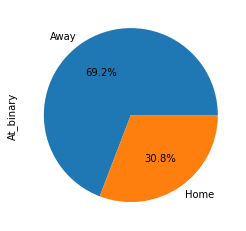

In [56]:
#pie chart - Compare between away wins and Home wins

df["At_binary"]=1
for i in range(len(df['city'])):
    if df['city'][i] in df['team1'][i] :
        df["At_binary"][i]=1
    else:
        df["At_binary"][i]=0

data = df.groupby("At")["At_binary"].count()
        
data.plot.pie(autopct="%.1f%%")

# Next Dataset - Deliveries

In [21]:
#Loading next dataset in for analysis

dx = pd.read_csv("C:/Users/DELL/Desktop/PES/DA Project/deliveries2.csv")

In [22]:
dx.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,winner
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Sunrisers Hyderabad
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Sunrisers Hyderabad
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,4,0,4,NaN,NaN,NaN,Sunrisers Hyderabad
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,NaN,NaN,NaN,Sunrisers Hyderabad
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,2,2,NaN,NaN,NaN,Sunrisers Hyderabad


In [23]:
dtf = dx.drop("match_id",axis=1)

In [24]:
print(dtf.groupby(['over','total_runs']).sum())

#barplots = sns.barplot(x=dtf['over'], y=dtf.groupby(['over','total_runs'].sum().index.get_level_values(1)).to_numeric)

                 inning   ball  is_super_over  wide_runs  bye_runs  \
over total_runs                                                      
1    0             7705  18425             17          0         0   
     1             3998   9654             31        322        14   
     2              695   1669              8         93         2   
     3               58    157              0          6         0   
     4             1845   4646             11          0        28   
...                 ...    ...            ...        ...       ...   
20   4             1165   3222              0          6        20   
     5               19     52              0         40         0   
     6              819   2311              0          0         0   
     7                5      8              0          0         0   
     8               10     23              0          0        12   

                 legbye_runs  noball_runs  penalty_runs  batsman_runs  \
over total_runs 

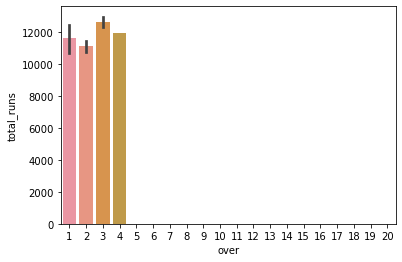

In [67]:
#combiming all overs in array and then plotting barplot

################################### ERROR AFTER 4TH OVER ################################

combine_over=dtf.groupby('over')["total_runs"].sum()

barto = sns.barplot(data=dtf,x=dtf['over'],y=combine_over)

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,winner
0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,...,0,0,0,0,0,0,NaN,0,NaN,Sunrisers Hyderabad
1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,...,0,0,0,0,0,0,NaN,0,NaN,Sunrisers Hyderabad
2,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,...,0,0,0,4,0,4,NaN,0,NaN,Sunrisers Hyderabad
3,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,...,0,0,0,0,0,0,NaN,0,NaN,Sunrisers Hyderabad
4,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,...,0,0,0,0,2,2,NaN,0,NaN,Sunrisers Hyderabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,3,Yuvraj Singh,DJ Hooda,YS Chahal,0,0,...,0,0,0,1,0,1,NaN,0,NaN,Sunrisers Hyderabad
96,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,4,DJ Hooda,Yuvraj Singh,YS Chahal,0,0,...,0,0,0,1,0,1,NaN,0,NaN,Sunrisers Hyderabad
97,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,5,Yuvraj Singh,DJ Hooda,YS Chahal,0,0,...,0,0,0,1,0,1,NaN,0,NaN,Sunrisers Hyderabad
98,1,Sunrisers Hyderabad,Royal Challengers Bangalore,16,6,DJ Hooda,Yuvraj Singh,YS Chahal,0,0,...,0,0,0,1,0,1,NaN,0,NaN,Sunrisers Hyderabad


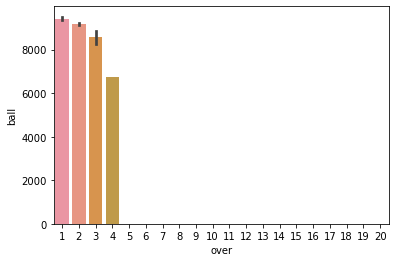

In [77]:
#Average number of balls in an over


avg_balls_plot=dtf.groupby('over')["ball"].count()

################################### ERROR AFTER 4TH OVER ################################

avg_balls = sns.barplot(data=dtf,x=dtf['over'],y=avg_balls_plot)

# Next Dataset - Over

In [80]:
dtx = pd.read_csv("C:/Users/DELL/Desktop/DA Project/over.csv")

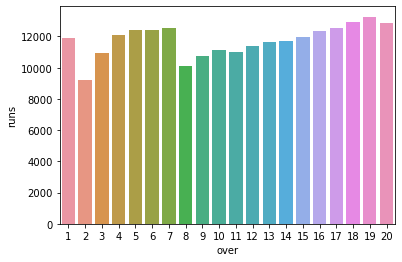

In [83]:
#Plot of number of runs in an over

runs_plot=dtx.groupby('over')["runs"].sum()

total_runs_plot= sns.barplot(data=dtx,x=dtx['over'],y=runs_plot)

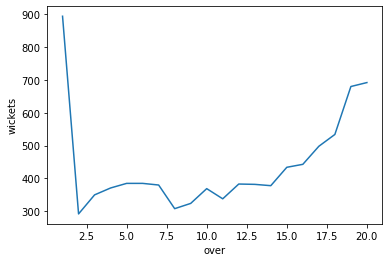

In [87]:
#Plot of number of runs in an over

wickets_plot=dtx.groupby('over')["wickets"].sum()

wicket_plot= sns.lineplot(data=dtx,x=dtx['over'],y=wickets_plot)

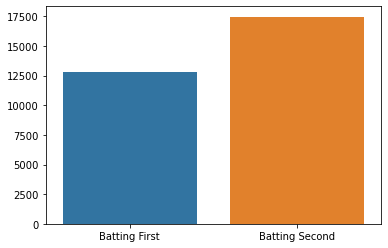

In [93]:
#batting first or batting second

batting_order=["Batting First", "Batting Second"]
Compare = [0,0]

for i in range(len(dtx['inning'])):
    if(dtx['batting_team'][i]==dtx['winner'][i]):
        Compare[0]+=1
    else:
        Compare[1]+=1

batting_plot= sns.barplot(data=dtx,x=batting_order,y=Compare)
                
